In [2]:
# author: github.com/petr0leum/Numerical_analysis

from numpy import pi, sqrt
import numpy as np
import matplotlib.pyplot as plt


In [3]:
h = pi/7
points = [0.5 * h, 1.5 * h, 2.5 * h,4.5 * h, 6.5 * h]
linspace = np.linspace(0, 10, 1000)


In [4]:
# Interpolated function. X: <float> or <vector>. Return: np.float64
F = lambda X: np.sin(X) * sqrt(X) + 1


In [5]:
# Get (X-X1)(X-X2)...(X-Xn-1). X: <float> or <vector>. Return: np.float64
arg_items = lambda arr, X: np.prod([(np.array(X)-Xi) for Xi in arr[:-1]], axis=0)


In [6]:
def coefficient(arr: list) -> np.float64:
    return np.sum(
                [F(Xi) / np.prod([Xi-Xj for j, Xj in enumerate(arr) if i!=j], axis=0) for i,Xi in enumerate(arr)]
                )

In [7]:
# Total Newton polynomial. X: <float> or <vector>. Return: <generator>
def Newton(arr: list, F, X):
    result = F(arr[0]) * np.ones(len(X)) # for the right dimension of vector
    yield result
    if len(arr) > 1:
        for k in range(2, len(arr)+1):  # k=2,3...len(arr)
            result += coefficient(arr[:k]) * arg_items(arr[:k], X)
            yield result


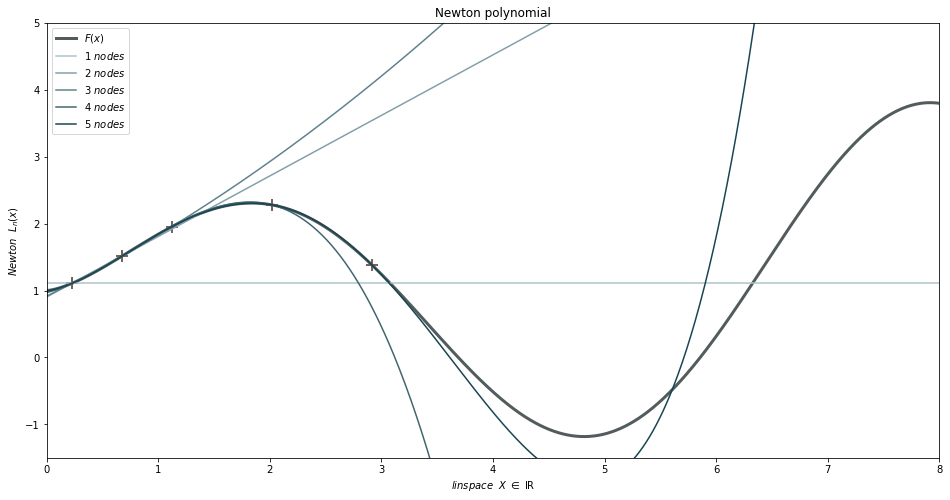

In [9]:
# Design:
ax = plt.subplots(figsize=(16, 8))
colors = ["#acc4cb", "#83a0a9", "#5f828c", "#41656f", "#184551"]
ax = plt.gca()
plt.xlabel(r'$linspace\ \ X\ \in\ {\rm I\!R}$')
plt.ylabel(r'$Newton\ \ L_n(x)$')
plt.xlim(0, 8); plt.ylim(-1.5, 5); plt.title("Newton polynomial")
# Plotting
plt.plot(linspace, F(linspace), linewidth=3, color="#525c5d", label=r'$F(x)$')
for i, line in enumerate(Newton(points, F, X=linspace)):
    plt.plot(linspace, line, color=colors[i], label=r'${}\ nodes$'.format(i+1))
    plt.scatter(points[i], F(points[i]), s=150, color="#512f26", marker="+")
ax.legend()
plt.show()